## Member Referrals

The below notebook contains the different insights from two different csv files containing different data of Customers and some logs. It tries to find answers for below questions :

   1. When do members refer?
    
   2. Does the channel members are acquired from significantly impact how they refer?
    
   3. We can send an email to members to invite them to refer their friends. When and to
       which target group should we send it?
       
   4. Does the data suggest that the referral behaviour of members changes over time?
       What trends, if any, do you expect going forward? How would you measure these?
       
<b>  Along with this, my main goal is to find from the above insights that, what all steps needs to be taken to increase the sign-ups via the 'Referral' sign-up channel.  </b>
       
I will be breaking the entire working into following stages:

   1. Read datasets
   2. Do any pre-processing (if required)
   3. Find the initial stats and present them using visualizations
   4. Find the insights by doing following methods:
     1. Deriving new features from the exisiting features
     2. Finding the dependency and mapping between two csv files
     3. Try to derive different dataframes from the exisiting dataframes and use them to plot different outcomes and   observations.
   5. Recommend different actions based on the Insight Analysis
   
The above questions are answered in different stages of this notebook. You will understand them as you go through this notebook.

Lets start by importing packages and libraries for graph display, I use %inline to show graph in same notebook window

## Imports

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import sklearn

from sklearn.metrics import accuracy_score,classification_report

#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(rc={'figure.figsize':(20,5)})


### Read First Dataset 

- This first csv file contains information on customers and metadata for each customer. It is a representative sample of the whole customer database.

- Let's explore this csv more by understanding the data

In [2]:
df = pd.read_csv('180601_Customer_Info.csv',sep=',')
df.head(10)

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website
5,1893,2021-03-14,Price Comparison Website
6,468,2021-06-10,Referral
7,2638,2021-12-24,Price Comparison Website
8,2110,2021-12-20,Price Comparison Website
9,2616,2021-09-29,Referral


In [3]:
# Check what types of columns are present 
df.dtypes

customer_id         int64
sign_up_date       object
sign_up_channel    object
dtype: object

In [4]:
df.isnull().sum()

customer_id        0
sign_up_date       0
sign_up_channel    0
dtype: int64

As we can see the Date is present in string format. So I will try to bring it in proper date time format below .

In [5]:
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'])

df.dtypes

customer_id                 int64
sign_up_date       datetime64[ns]
sign_up_channel            object
dtype: object

Now, from the above dataset we have 3 different columns like customer_id, sign_up_date, sign_up_channel. So lets find some insights from this data by plotting them and get the stats.

1. I will plot a pie chart for sign_up_channel column to get % values
2. I will get the trend of sign_up_channels used over the period of time using line chart

Text(-0.3,1.3,'Sign_up_channel percentages')

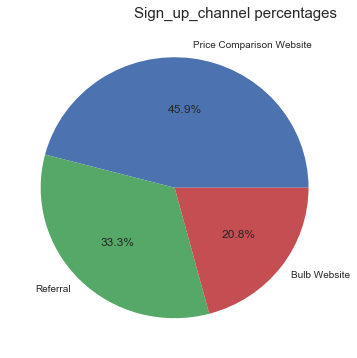

In [6]:
#pie chart for sign_up_channel column to get % values

fig, ax = plt.subplots(figsize=(6,6))
fig.subplots_adjust(hspace=50)
size_counts = df["sign_up_channel"].value_counts()
ax.pie(df['sign_up_channel'].value_counts(),labels=size_counts.index,autopct="%.1f%%")
ax.text(-0.3,1.3,'Sign_up_channel percentages',fontsize=15)

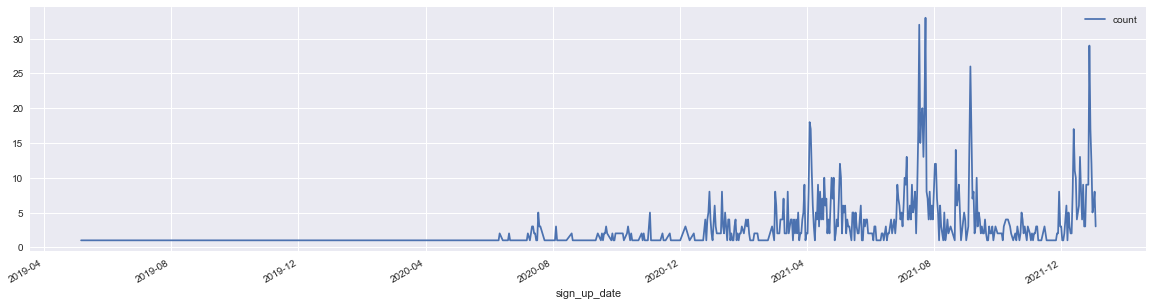

In [7]:
# trend of count of sign_up_channels used over the period of time

df_yearly=df.groupby('sign_up_date').agg(['count']).reset_index()
df_yearly.plot(x='sign_up_date', y='sign_up_channel',kind="line")
plt.show()

#### Observations

    1. It can be seen that the 'Price_Comparison_Website' sign_up_channel is used by almost 46% customers, whereas 'referral' channel is used by 33.3% customers, whereas 'Bulb Website' is used least with approx 21%.
    
    2. From the second plot I can say that, during the year of 2021 the sign_up's of the customer are seen more s compared to other years.
    

Now let's dig some more in this data by deriving different columns from the initial one's.

- I will derive years and month seperately in to new columns.


- As seen in the above graph the line for year 2019 was almost flat and year 2022 was not shown in a group_by function. So let's see what data of these two years we have. As they might be of some ending/starting months of that year. Also I will check the trend of sign-ups in the remaining years 2020 and 2021


- From the months I can get the period or season in general, when people are signing up more.

In [8]:
df['year'] = pd.DatetimeIndex(df['sign_up_date']).year
df.head()

,customer_id,sign_up_date,sign_up_channel,year
0,2543,2021-04-26,Price Comparison Website,2021
1,2181,2021-07-24,Referral,2021
2,2399,2020-10-11,Bulb Website,2020
3,674,2021-04-04,Referral,2021
4,2332,2021-09-05,Price Comparison Website,2021


In [9]:
df_2 = df[df['year']==2019]
df_2

,customer_id,sign_up_date,sign_up_channel,year
217,2712,2019-11-29,Price Comparison Website,2019
680,446,2019-09-23,Bulb Website,2019
703,12,2019-10-16,Price Comparison Website,2019
877,329,2019-12-16,Bulb Website,2019
881,2562,2019-10-09,Bulb Website,2019
1029,790,2019-05-07,Bulb Website,2019
1068,2157,2019-11-30,Price Comparison Website,2019
1102,539,2019-10-26,Bulb Website,2019
1171,291,2019-10-19,Price Comparison Website,2019
1554,2688,2019-11-11,Price Comparison Website,2019


- From the above cell, although the year 2019 contains data of different months, it is very less. So this might affect our observations or predictions if we do so.

- <b>It can be seen that during this year, channel 'Price Comparison Website' and 'Bulb Website' are only used for sign-ups with both used at same ratio, whereas the third channel 'Referral' was not introduced at all.

In [10]:
df_3 = df[(df['year']==2020) | (df['year']==2021)]
df_3.head(10)

,customer_id,sign_up_date,sign_up_channel,year
0,2543,2021-04-26,Price Comparison Website,2021
1,2181,2021-07-24,Referral,2021
2,2399,2020-10-11,Bulb Website,2020
3,674,2021-04-04,Referral,2021
4,2332,2021-09-05,Price Comparison Website,2021
5,1893,2021-03-14,Price Comparison Website,2021
6,468,2021-06-10,Referral,2021
7,2638,2021-12-24,Price Comparison Website,2021
8,2110,2021-12-20,Price Comparison Website,2021
9,2616,2021-09-29,Referral,2021


C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


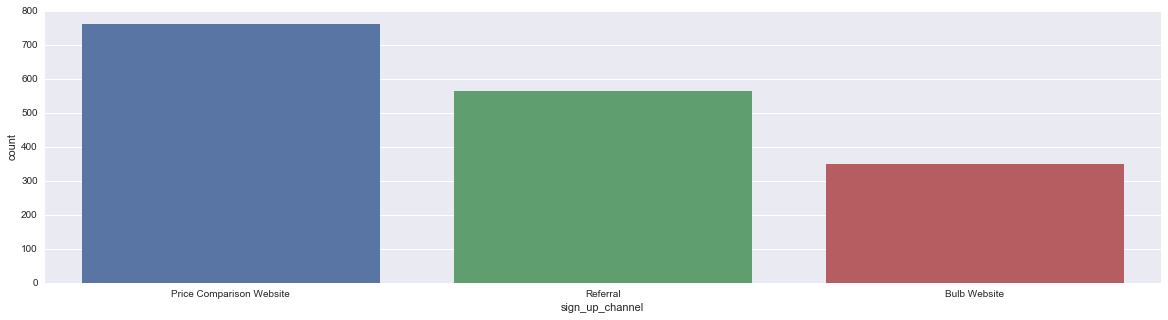

In [11]:
sns.countplot(x='sign_up_channel',data=df_3)



<b>From the cells above it can be seen that during these years 2020 and 2021 , channel 'Price Comparison Website' was used most for the sign-ups. However, the introduction of 'Referral'channel brought a noticable change in the customer's sign-ups and 'Bulb Website' was used very less time as compared to other two.

In [12]:
df_1 = df[df['year']==2022]
df_1

,customer_id,sign_up_date,sign_up_channel,year
13,1929,2022-01-02,Price Comparison Website,2022
20,2241,2022-01-01,Price Comparison Website,2022
23,2770,2022-01-01,Price Comparison Website,2022
140,2434,2022-01-03,Referral,2022
510,2050,2022-01-02,Price Comparison Website,2022
531,2708,2022-01-03,Price Comparison Website,2022
558,2550,2022-01-02,Price Comparison Website,2022
560,1914,2022-01-01,Referral,2022
568,2428,2022-01-02,Price Comparison Website,2022
817,2384,2022-01-01,Price Comparison Website,2022


 - Here, from the above cell I can see only the data of first month of year 2022 is available, and that was the reason , in the line chart it was not occuring.
 - <b> Main thing to be observed is that, channel 'Price Comparison Website' is still used more for the sign-ups rather than 'Referral' or  'Website' </b>

Let's see the trends in the months of these years.

In [13]:
df['month'] = pd.DatetimeIndex(df['sign_up_date']).month
df.head()

,customer_id,sign_up_date,sign_up_channel,year,month
0,2543,2021-04-26,Price Comparison Website,2021,4
1,2181,2021-07-24,Referral,2021,7
2,2399,2020-10-11,Bulb Website,2020,10
3,674,2021-04-04,Referral,2021,4
4,2332,2021-09-05,Price Comparison Website,2021,9


C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


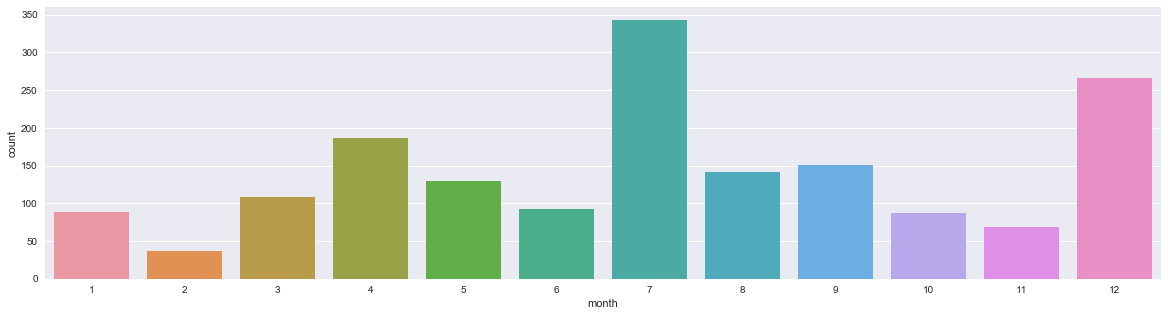

In [14]:
sns.countplot(x='month',data=df)

In [15]:
df['sign_up_per_quarters']= df['sign_up_date'].dt.quarter
df.head()

,customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters
0,2543,2021-04-26,Price Comparison Website,2021,4,2
1,2181,2021-07-24,Referral,2021,7,3
2,2399,2020-10-11,Bulb Website,2020,10,4
3,674,2021-04-04,Referral,2021,4,2
4,2332,2021-09-05,Price Comparison Website,2021,9,3


C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


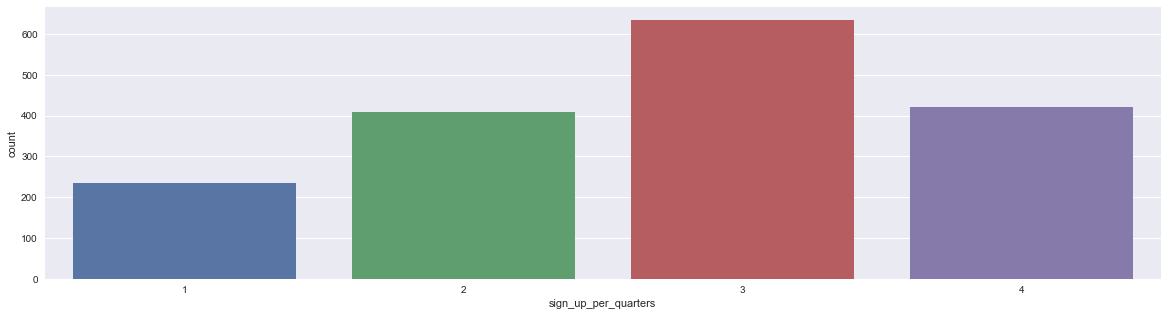

In [16]:
sns.countplot(x='sign_up_per_quarters',data=df)

#### Observations

    1. It can be observed that from the month of April to month of September the sign-ups are quite frequent with maximum for month of July. This can be because , most of the people search for their new homes during this period and hence they look out for better energy provider options for their house. Also as it is the mid of Summer season and hence the avaibility of Solar energy renewable resource is on huge amount,I think that can also affect the sign-up's count.
    
    2. Even during the month of December, the sign-ups are more. Whereas, during the initial 3 months of any year their are very less sign-ups.
    
    3. In terms of yearly quarters, the sign-up are more in the 3rd quarter, while the 2nd and 4th quarters stays at same level, with first quarter at the least
    
#### Suggestions

From the above analysis, I can suggest that, in order to increase the sign-ups following things can be done :
    1. Months which are having less amount of sign-ups should be targeted. This can be done by giving some offers to customer. Giving some offers to the existing customers for referring other new customers, thus indirectly it will affect our goal of increasing the sign-ups from Member Referrals channel.

### Read Second Dataset

- The Referral Info CSV is a log of sign-ups that have been received from the <b>Referral Channel</b>
- Let's explore this csv more by understanding the data

In [17]:
df1 = pd.read_csv('180601_Referrals_Info.csv',sep=',')
df1.head()


,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [18]:
# Check what types of columns are present 

df1.dtypes

referral_date           object
referrer_customer_id     int64
sign_up_customer_id      int64
dtype: object

As we can see the Date is present in string format. So I will try to bring it in proper date time format below .

In [19]:
df1['referral_date'] = pd.to_datetime(df1['referral_date'])
df1.dtypes

referral_date           datetime64[ns]
referrer_customer_id             int64
sign_up_customer_id              int64
dtype: object

Now, from the above dataset we have 3 different columns like referral_date,referrer_customer_id, sign_up_customer_id. So from this, I can understand that, the 'referrer_customer_id' is the same as the 'customer_id' that was present in our first dataset.

- So from this I will get the counts of referrals for that each referrer_customer.

In [20]:
# get only the 'referrer_customer_id' column of dataframe to do to further analysis

df2=df1.filter(['referrer_customer_id'],axis=1)
df2.head()

,referrer_customer_id
0,795
1,577
2,868
3,801
4,690


In [21]:
# add a new column to the dataframe which will show the value_counts of that referrer_customer_id i.e the 
# no.of times this customer has referred some other customer

df2['count']=df2.referrer_customer_id.value_counts()
df2.head()

,referrer_customer_id,count
0,795,1.0
1,577,1.0
2,868,1.0
3,801,1.0
4,690,1.0


In [22]:
# now that I have got the counts for each referrer customers I will arrange them in descending order, to see which customer has
# done more number of referrals

df3=df2.sort_values('count',ascending=False)
df3.head(20)

,referrer_customer_id,count
8,541,34.0
6,372,11.0
36,826,9.0
10,3,9.0
37,358,8.0
54,211,7.0
214,495,6.0
117,652,6.0
133,401,5.0
332,432,4.0


#### Observation

- It can be seen that the 'referrer_id = 541' has referred another customers 34 times the max, and in the same way other existing customers have referred other customers.


Now, let's just find and split the customers from the above observations in to two different database as per their no. of referrals count.
    1. Dataframe with counts more than 3
    2. Dataframe with counts less than equal to 3

Let's continue with first dataframe (count>3) and see if we can get more insights

In [23]:
df4=df3[df3['count']>3]

df4

,referrer_customer_id,count
8,541,34.0
6,372,11.0
36,826,9.0
10,3,9.0
37,358,8.0
54,211,7.0
214,495,6.0
117,652,6.0
133,401,5.0
332,432,4.0


#### Observations and Suggestions

- So, from the above observations it can be said that, definitely these customers are most valuable customers, because they refer many new customers and urges them to use the energy provided by Bulb.

-  They understand how necessary it is to use renewable energy in this period and save atmosphere from getting degraded.

- I would like to suggest, that we can target these customers by providing them more energy options, offers, referral bonuses and keep them happy and encourage them to further asks their referrals to continue referring other people, thus increasing the chain and awareness.

- Indirectly, it will impact our goal of increasing the sign-ups through 'Referral Channel'.

Dataframe with count<=3

In [24]:
# this dataframe gives us the data of the members (customer_data) who has referred less than 4 times

df6 = df3[df3['count']<4]
print(df6.shape)
df6.head(10)

(854, 2)


,referrer_customer_id,count
340,10,3.0
531,663,3.0
264,344,3.0
322,488,3.0
373,5,2.0
616,8,2.0
725,825,2.0
178,140,2.0
709,371,2.0
516,764,2.0


#### Observations and Suggestions

- So, from the above observations it can be said that, these 854 customers are also valuable customers, because they also refer many new customers and urges them to use the energy provided by Bulb although not to that extent, as the above customers did.

- I would like to suggest, that we can target these customers by providing them more awareness of saving energy, can send emails to invite them to refer their friends and encourage them increase the chain and awareness.

- Indirectly, here also it will impact our goal of increasing the sign-ups through 'Referral Channel'.

<b>Now that I have got the overview from both the datasets individually. I will try to map the two files together based on the customer_id's of first dataset and the referrer_customer_id of the second dataset (as both are same) and try to find more insights that may help more in my Analysis.

- I will make use of the two above dataframes (df and df1) formed from the first and second dataset csv files to do the further analysis.

- I will perform a inner join operation on these two datasets, which will give me a dataframe containing columns from both the datasets.

- This will help me analysing following things
   - I will get the counts of sign-up channels used by these customers, the year in which they made the most sign-up and similarly the months.
   - I will derive a new column nb_months which will give me the difference between the sign-up date of a customer and the respective referral date when he/she has referred. This can help me understanding the timeline of a customer, of how quickly the customer starts referring to another customer after the sign-ups.
   - I will also check if there is chain of referrals being done. It means that the chain referrer_customer_id -> sign_up_customer_id -> referrer_customer_id is present or not. This can help us in getting the referral depth of our customers, of how often they are referring and signing_up.

Performing a join operation

In [25]:
df_new = df1.join(df.set_index('customer_id'), on='referrer_customer_id')
df_new.sort_values('referrer_customer_id')

,referral_date,referrer_customer_id,sign_up_customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters
484,2021-05-29,0,869,2020-06-20,Price Comparison Website,2020.0,6.0,2.0
323,2021-12-23,1,870,2021-10-25,Bulb Website,2021.0,10.0,4.0
246,2021-04-10,2,871,2021-04-04,Referral,2021.0,4.0,2.0
10,2021-12-30,3,872,2021-08-03,Price Comparison Website,2021.0,8.0,3.0
76,2021-08-16,4,873,2020-08-20,Price Comparison Website,2020.0,8.0,3.0
373,2021-07-24,5,874,NaT,NaN,NaN,NaN,NaN
701,2021-08-22,6,1410,2020-12-25,Referral,2020.0,12.0,4.0
217,2021-05-05,6,1161,2020-12-25,Referral,2020.0,12.0,4.0
858,2021-05-05,6,1308,2020-12-25,Referral,2020.0,12.0,4.0
281,2021-03-08,6,1764,2020-12-25,Referral,2020.0,12.0,4.0


In [26]:
# I will drop the records which are giving us NaN values

df_new1=df_new.dropna()
df_new1.sort_values('referrer_customer_id')

,referral_date,referrer_customer_id,sign_up_customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters
484,2021-05-29,0,869,2020-06-20,Price Comparison Website,2020.0,6.0,2.0
323,2021-12-23,1,870,2021-10-25,Bulb Website,2021.0,10.0,4.0
246,2021-04-10,2,871,2021-04-04,Referral,2021.0,4.0,2.0
10,2021-12-30,3,872,2021-08-03,Price Comparison Website,2021.0,8.0,3.0
76,2021-08-16,4,873,2020-08-20,Price Comparison Website,2020.0,8.0,3.0
49,2021-07-14,6,1034,2020-12-25,Referral,2020.0,12.0,4.0
927,2021-04-10,6,875,2020-12-25,Referral,2020.0,12.0,4.0
818,2021-07-24,6,1414,2020-12-25,Referral,2020.0,12.0,4.0
701,2021-08-22,6,1410,2020-12-25,Referral,2020.0,12.0,4.0
131,2021-07-17,6,1588,2020-12-25,Referral,2020.0,12.0,4.0


Getting the counts of my main columns

In [27]:
# deriving this new dataframe just to get the counts of the below columns and plot them

df_new2=df_new1.filter(['sign_up_channel','year','month'],axis=1)
df_new2

,sign_up_channel,year,month
0,Price Comparison Website,2021.0,3.0
1,Price Comparison Website,2021.0,3.0
2,Bulb Website,2021.0,3.0
3,Referral,2021.0,4.0
4,Price Comparison Website,2021.0,7.0
5,Referral,2020.0,11.0
6,Referral,2020.0,12.0
7,Referral,2021.0,3.0
8,Bulb Website,2021.0,6.0
9,Referral,2021.0,3.0


C:\Users\pnkjs\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


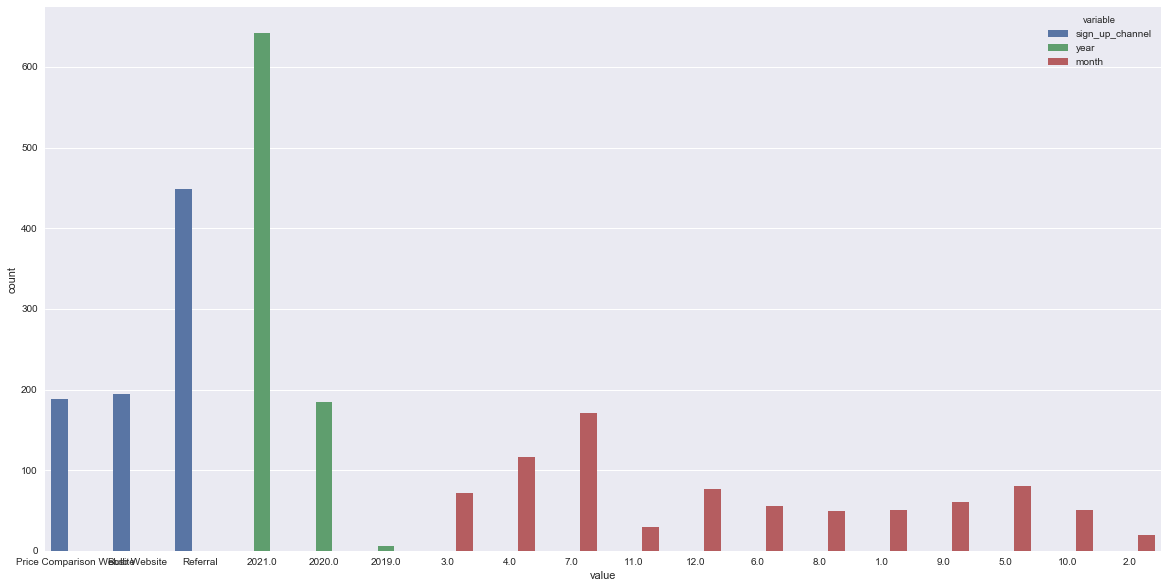

In [28]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot(x="value", hue="variable", data=pd.melt(df_new2))

plt.show()

#### Observation

- From the above cell, it can be observed that these customers have used the 'Referral Channel' for the sign-ups. Thus, encouraging us to promote our goal (i.e to increase the sign-ups more via this channel)

- Our previous findings and these findings in terms of year and month are hence confirmed and I can state that July is giving us loads of sign-ups, and we should target other months with less sign-up's more.

Finding the difference between referral date and sign_up_date to see which customer is very quick and frequent in referring

In [29]:
df_new1['nb_months'] = ((df_new1.referral_date - df_new1.sign_up_date)/np.timedelta64(1, 'M'))
df_new1.sort_values('referrer_customer_id')

C:\Users\pnkjs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,referral_date,referrer_customer_id,sign_up_customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters,nb_months
484,2021-05-29,0,869,2020-06-20,Price Comparison Website,2020.0,6.0,2.0,11.269225
323,2021-12-23,1,870,2021-10-25,Bulb Website,2021.0,10.0,4.0,1.938438
246,2021-04-10,2,871,2021-04-04,Referral,2021.0,4.0,2.0,0.197129
10,2021-12-30,3,872,2021-08-03,Price Comparison Website,2021.0,8.0,3.0,4.895378
76,2021-08-16,4,873,2020-08-20,Price Comparison Website,2020.0,8.0,3.0,11.860613
49,2021-07-14,6,1034,2020-12-25,Referral,2020.0,12.0,4.0,6.603832
927,2021-04-10,6,875,2020-12-25,Referral,2020.0,12.0,4.0,3.482618
818,2021-07-24,6,1414,2020-12-25,Referral,2020.0,12.0,4.0,6.932381
701,2021-08-22,6,1410,2020-12-25,Referral,2020.0,12.0,4.0,7.885172
131,2021-07-17,6,1588,2020-12-25,Referral,2020.0,12.0,4.0,6.702396


Finding the chain ( depth/level of the referring )

In [30]:
# finding the chain .. shuffle two ids
df_new4_1 = df_new1.loc[df_new1['sign_up_customer_id'].isin(df_new1.referrer_customer_id.values)]
df_new4_1

,referral_date,referrer_customer_id,sign_up_customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters,nb_months
17,2021-01-31,559,632,2021-01-29,Referral,2021.0,1.0,1.0,0.065710
25,2021-06-25,10,425,2021-04-15,Referral,2021.0,4.0,2.0,2.332697
31,2021-07-24,107,260,2021-06-29,Price Comparison Website,2021.0,6.0,2.0,0.821372
582,2021-07-24,248,271,2021-07-20,Referral,2021.0,7.0,3.0,0.131420
592,2021-09-08,71,699,2021-07-20,Referral,2021.0,7.0,3.0,1.642744
897,2021-09-20,214,432,2020-07-19,Referral,2020.0,7.0,3.0,14.061890


In [31]:
df_new4_2 = df_new1.loc[df_new1['referrer_customer_id'].isin(df_new1.sign_up_customer_id.values)]
df_new4_2

,referral_date,referrer_customer_id,sign_up_customer_id,sign_up_date,sign_up_channel,year,month,sign_up_per_quarters,nb_months
58,2021-07-24,271,1158,2021-07-24,Referral,2021.0,7.0,3.0,0.000000
332,2021-09-23,432,1340,2021-09-20,Referral,2021.0,9.0,3.0,0.098565
599,2022-01-02,699,1647,2021-09-08,Referral,2021.0,9.0,3.0,3.811167
723,2021-07-19,632,1569,2021-01-31,Referral,2021.0,1.0,1.0,5.552475
733,2021-07-31,425,1333,2021-06-25,Referral,2021.0,6.0,2.0,1.182776
865,2021-07-24,260,1147,2021-07-24,Referral,2021.0,7.0,3.0,0.000000


From the above two cells I can observe that there are these 6 customers with ids(632,425,260,271,699,432) who are referred by their friends and in return they are referring to their other friends. 

<b>- This insight on chaining of referrences can indirectly promote in our goal of increasing the sign_ups via 'Referral' channel.
